# Complete Exploratory Data Analysis

## Georgia Tech MSA Spring 2026 Practicum

This is where your full EDA goes. We look forward to digging deeper into your analysis here.

Read the [eda_outline.md](eda_outline.md) for more details.

## Inital EDA
The research question that this project started with was: How do market odds shift after goals and how do these shifts compare to the statistical impact of the events?

Unfortunately, after extensive exploration and data integrity checks, I concluded that the datasets are not sufficient to support a comprehensive analysis of this question. Nevertheless, the EDA is significant and parts of it are highlighted below.

In [1]:
from pathlib import Path
import polars as pl

polymarket_directory = Path("../data/Polymarket")
statsbomb_directory = Path("../data/Statsbomb")


In [2]:
def load_matches():
    # Load match data from Statsbomb.
    matches = pl.read_parquet(statsbomb_directory / "matches.parquet")

    # Calculate the UTC kickoff time for later alignment with Polymarket data
    matches = matches.with_columns(
        pl.format("{} {}", pl.col("match_date"), pl.col("kickoff"))
        .str.to_datetime("%Y-%m-%d %H:%M:%S")
        .alias("kickoff_utc")
    )

    return matches

matches = load_matches()

print(f"Total Matches Loaded: {len(matches)}")
with pl.Config(tbl_cols=-1):
    print(matches.head())

Total Matches Loaded: 3464
shape: (5, 37)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ mat ┆ mat ┆ mat ┆ mat ┆ mat ┆ kic ┆ hom ┆ awa ┆ com ┆ com ┆ com ┆ sea ┆ sea ┆ hom ┆ hom ┆ hom ┆ awa ┆ awa ┆ awa ┆ sta ┆ sta ┆ ref ┆ ref ┆ las ┆ las ┆ dat ┆ sho ┆ xy_ ┆ com ┆ gen ┆ is_ ┆ is_ ┆ cou ┆ sea ┆ mat ┆ mat ┆ kic │
│ ch_ ┆ ch_ ┆ ch_ ┆ ch_ ┆ ch_ ┆ kof ┆ e_s ┆ y_s ┆ pet ┆ pet ┆ pet ┆ son ┆ son ┆ e_t ┆ e_t ┆ e_m ┆ y_t ┆ y_t ┆ y_m ┆ diu ┆ diu ┆ ere ┆ ere ┆ t_u ┆ t_u ┆ a_v ┆ t_f ┆ fid ┆ pet ┆ der ┆ you ┆ int ┆ ntr ┆ son ┆ ch_ ┆ ch_ ┆ kof │
│ id  ┆ dat ┆ wee ┆ sta ┆ sta ┆ f   ┆ cor ┆ cor ┆ iti ┆ iti ┆ iti ┆ _id ┆ --- ┆ eam ┆ eam ┆ ana ┆ eam ┆ eam ┆ ana ┆ m_i ┆ m   ┆ e_i ┆ e   ┆ pda ┆ pda ┆ ers ┆ ide ┆ eli ┆ iti ┆ --- ┆ th  ┆ ern ┆ y_n ┆ _na ┆ upd ┆ ava ┆ f_u │
│ --- ┆ e   ┆ k   ┆ tus ┆ tus ┆ --- ┆ e   ┆ e   ┆ on_ ┆ on  ┆ 

In [3]:
def events_to_utc(matches_df):
    # Use kickoff time to convert event timestamps to UTC
    events = pl.read_parquet(statsbomb_directory / "events.parquet")

    events = events.join(matches_df, on="match_id", how="left").with_columns(
        (pl.col("kickoff_utc") + pl.duration(minutes="minute", seconds="second")).alias("event_time_utc")
    )

    return events

events = events_to_utc(matches)

In [4]:
with pl.Config(tbl_cols=-1):
    print(events[0,:])

shape: (1, 149)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ id  ┆ ind ┆ per ┆ min ┆ sec ┆ tim ┆ dur ┆ loc ┆ loc ┆ pos ┆ pos ┆ pos ┆ out ┆ off ┆ co

In [5]:
# Explore documented event types
with pl.Config(tbl_rows=-1):
    print(events.select("type").unique())

shape: (35, 1)
┌───────────────────┐
│ type              │
│ ---               │
│ str               │
╞═══════════════════╡
│ Clearance         │
│ Bad Behaviour     │
│ Own Goal Against  │
│ Starting XI       │
│ Dribbled Past     │
│ Camera On         │
│ Referee Ball-Drop │
│ Foul Committed    │
│ Ball Receipt*     │
│ Foul Won          │
│ Shield            │
│ Dispossessed      │
│ Substitution      │
│ Block             │
│ Miscontrol        │
│ Error             │
│ Interception      │
│ Camera off        │
│ Tactical Shift    │
│ Pressure          │
│ Half End          │
│ Duel              │
│ Offside           │
│ Injury Stoppage   │
│ Own Goal For      │
│ Player On         │
│ Half Start        │
│ Carry             │
│ Pass              │
│ Player Off        │
│ 50/50             │
│ Goal Keeper       │
│ Ball Recovery     │
│ Shot              │
│ Dribble           │
└───────────────────┘


In [6]:
# Explore documented shot outcomes
with pl.Config(tbl_rows=-1):
    print(events.select("shot_outcome").unique())

shape: (9, 1)
┌──────────────────┐
│ shot_outcome     │
│ ---              │
│ str              │
╞══════════════════╡
│ Saved Off Target │
│ Saved to Post    │
│ Goal             │
│ Post             │
│ Saved            │
│ Wayward          │
│ Blocked          │
│ null             │
│ Off T            │
└──────────────────┘


In [7]:
# Filter for goal events and select relevant columns
goals = events.filter((pl.col("type") == "Shot") & (pl.col("shot_outcome") == "Goal")).select(["match_id", "team", "shot_statsbomb_xg", "home_team", "away_team", "event_time_utc"])

print(goals.head())

shape: (5, 6)
┌──────────┬───────────┬───────────────────┬─────────────────┬──────────────────┬──────────────────┐
│ match_id ┆ team      ┆ shot_statsbomb_xg ┆ home_team       ┆ away_team        ┆ event_time_utc   │
│ ---      ┆ ---       ┆ ---               ┆ ---             ┆ ---              ┆ ---              │
│ i32      ┆ str       ┆ f32               ┆ str             ┆ str              ┆ datetime[μs]     │
╞══════════╪═══════════╪═══════════════════╪═════════════════╪══════════════════╪══════════════════╡
│ 15946    ┆ Barcelona ┆ 0.083203          ┆ Barcelona       ┆ Deportivo Alavés ┆ 2018-08-18       │
│          ┆           ┆                   ┆                 ┆                  ┆ 23:18:12         │
│ 15946    ┆ Barcelona ┆ 0.105343          ┆ Barcelona       ┆ Deportivo Alavés ┆ 2018-08-18       │
│          ┆           ┆                   ┆                 ┆                  ┆ 23:37:41         │
│ 15946    ┆ Barcelona ┆ 0.420624          ┆ Barcelona       ┆ Deportivo Alav

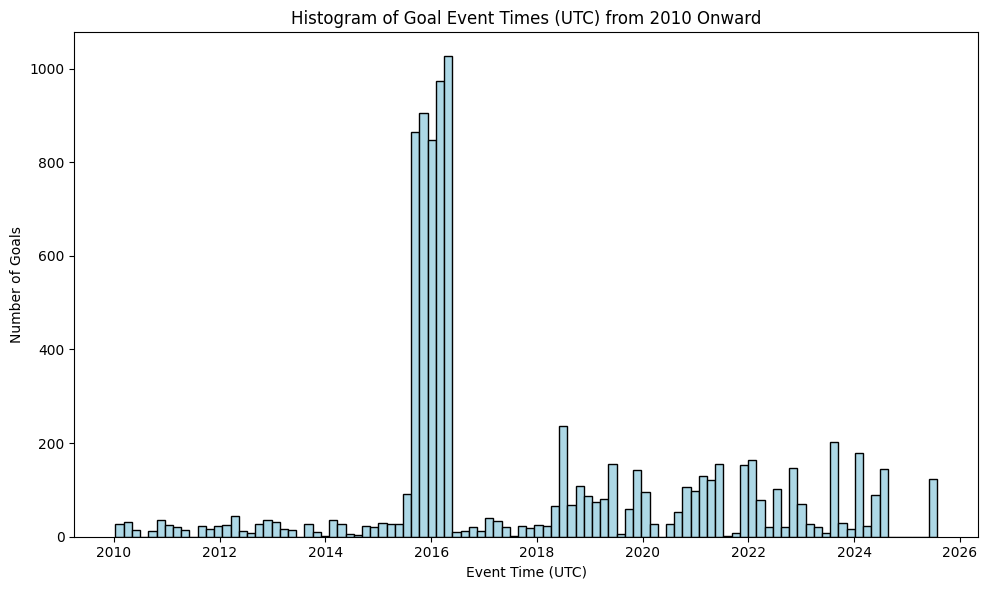

In [8]:
# Plot a histogram of goal event times (UTC) to visualize density of data across the timeline

import matplotlib.pyplot as plt

goals_2010 = goals.filter(pl.col("event_time_utc") >= pl.datetime(2010, 1, 1))

event_times = goals_2010["event_time_utc"].to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(event_times, bins=100, color='lightblue', edgecolor='black')
plt.xlabel('Event Time (UTC)')
plt.ylabel('Number of Goals')
plt.title('Histogram of Goal Event Times (UTC) from 2010 Onward')
plt.tight_layout()
plt.show()

In [9]:
def load_red_cards():
    lineups = pl.read_parquet(statsbomb_directory / "lineups.parquet") # Get lineups data where red card info is stored

    red_cards = lineups.filter(pl.col("card_type") == "Red Card") # Filter for red cards only
    red_cards = red_cards.join(matches, on="match_id", how="left") # Join with matches to get kickoff time

    # Filter out rows where to_time is null where there is missing time info 
    red_cards = red_cards.filter(pl.col("to_time").is_not_null())

    # Split time into minutes and seconds to avoid errors with soccer match clock structure (no hours)
    red_cards = red_cards.with_columns(
        pl.col("to_time").str.split_exact(":", 1).alias("time_split")
    ).with_columns([
        pl.col("time_split").struct.field("field_0").cast(pl.Int64).alias("minutes"),
        pl.col("time_split").struct.field("field_1").cast(pl.Int64).alias("seconds")
    ])

    # Calculate red card time in UTC by adding minutes and seconds to kickoff time
    red_cards = red_cards.with_columns(
        (pl.col("kickoff_utc") + 
         pl.duration(minutes=pl.col("minutes"), seconds=pl.col("seconds"))
        ).alias("event_time_utc")
    )

    # Keep last record for each player to capture correct send off time
    red_cards = (red_cards.sort("event_time_utc").unique(subset=["match_id", "player_name"], keep="last")) 
    
    return red_cards.unique(subset=["match_id", "player_name"], keep="last").select([
    "match_id", 
    "team_name",     
    "home_team",    
    "away_team",     
    "player_name", 
    "event_time_utc"
])

red_cards = load_red_cards()

In [10]:
print(red_cards.head())

shape: (5, 6)
┌──────────┬─────────────────┬─────────────────┬─────────────────┬────────────────┬────────────────┐
│ match_id ┆ team_name       ┆ home_team       ┆ away_team       ┆ player_name    ┆ event_time_utc │
│ ---      ┆ ---             ┆ ---             ┆ ---             ┆ ---            ┆ ---            │
│ i32      ┆ str             ┆ str             ┆ str             ┆ str            ┆ datetime[μs]   │
╞══════════╪═════════════════╪═════════════════╪═════════════════╪════════════════╪════════════════╡
│ 3879746  ┆ Inter Milan     ┆ Fiorentina      ┆ Inter Milan     ┆ Geoffrey       ┆ 2016-02-14     │
│          ┆                 ┆                 ┆                 ┆ Kondogbia      ┆ 23:08:38       │
│ 3794690  ┆ Netherlands     ┆ Netherlands     ┆ Czech Republic  ┆ Matthijs de    ┆ 2021-06-27     │
│          ┆                 ┆                 ┆                 ┆ Ligt           ┆ 19:26:06       │
│ 3890410  ┆ Borussia        ┆ Borussia        ┆ Darmstadt 98    ┆ Granit Xha

In [11]:
# Understand red cards data and check for any issues with time conversion
# This was used to correct the load_red_cards function after discovering some red card times were off when validating against ESPN match report data. 
# Some red cards had null to_time values causing errors
# By filtering out rows with null to_time and keeping the last record for each player, the correct send off time for all red cards is captured.
# Validated against ESPN match report 

lineups = pl.read_parquet(statsbomb_directory / "lineups.parquet") # Get lineups data

with pl.Config(tbl_cols=-1):
	print(lineups.filter(
		(pl.col("card_type") == "Red Card") & (pl.col("match_id") == 3754007)
	))

shape: (6, 17)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ mat ┆ tea ┆ pla ┆ pla ┆ pla ┆ jer ┆ cou ┆ cou ┆ tea ┆ pos ┆ fro ┆ to_ ┆ fro ┆ to_ ┆ car ┆ car ┆ car │
│ ch_ ┆ m_i ┆ yer ┆ yer ┆ yer ┆ sey ┆ ntr ┆ ntr ┆ m_n ┆ iti ┆ m_t ┆ tim ┆ m_p ┆ per ┆ d_t ┆ d_t ┆ d_r │
│ id  ┆ d   ┆ _id ┆ _na ┆ _ni ┆ _nu ┆ y_i ┆ y_n ┆ ame ┆ on_ ┆ ime ┆ e   ┆ eri ┆ iod ┆ ime ┆ ype ┆ eas │
│ --- ┆ --- ┆ --- ┆ me  ┆ ckn ┆ mbe ┆ d   ┆ ame ┆ --- ┆ nam ┆ --- ┆ --- ┆ od  ┆ --- ┆ --- ┆ --- ┆ on  │
│ i32 ┆ i32 ┆ i32 ┆ --- ┆ ame ┆ r   ┆ --- ┆ --- ┆ str ┆ e   ┆ str ┆ str ┆ --- ┆ i32 ┆ str ┆ str ┆ --- │
│     ┆     ┆     ┆ str ┆ --- ┆ --- ┆ i32 ┆ str ┆     ┆ --- ┆     ┆     ┆ i32 ┆     ┆     ┆     ┆ str │
│     ┆     ┆     ┆     ┆ str ┆ i32 ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 375 ┆ 30  ┆ 363 ┆ Cha ┆ nul ┆ 16  ┆ 201 ┆ Sco ┆

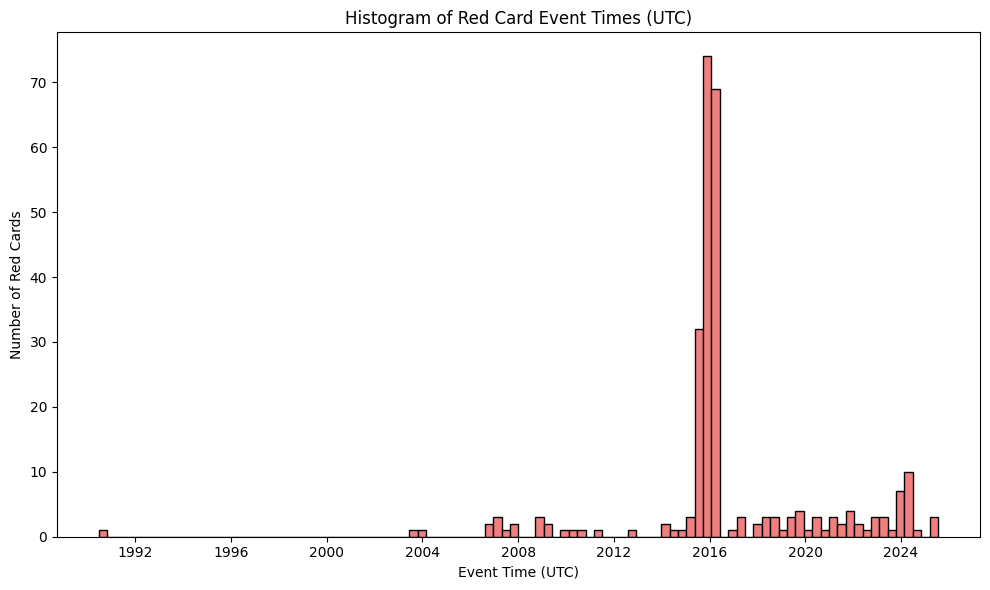

In [68]:
rc_times = red_cards["event_time_utc"].to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(rc_times, bins=100, color='lightcoral', edgecolor='black')
plt.xlabel('Event Time (UTC)')
plt.ylabel('Number of Red Cards')
plt.title('Histogram of Red Card Event Times (UTC)')
plt.tight_layout()
plt.show()

In [12]:
# Load odds history data from Polymarket and convert timestamps to datetime format

def load_all_odds():
    return (
        pl.scan_parquet(polymarket_directory / "soccer_odds_history.parquet")
        .with_columns(pl.col("timestamp").cast(pl.Int64).cast(pl.Datetime("ms")))
        .collect()
    )

odds_history = load_all_odds()
markets = pl.read_parquet(polymarket_directory / "soccer_markets.parquet")
tokens = pl.read_parquet(polymarket_directory / "soccer_tokens.parquet")

In [13]:
with pl.Config(tbl_cols=-1, tbl_rows=-1):
    print(markets.head(20))

shape: (20, 10)
┌──────────┬─────────┬─────────┬─────────┬─────────┬─────────┬────────┬────────┬─────────┬─────────┐
│ market_i ┆ questio ┆ slug    ┆ event_s ┆ categor ┆ volume  ┆ active ┆ closed ┆ created ┆ end_dat │
│ d        ┆ n       ┆ ---     ┆ lug     ┆ y       ┆ ---     ┆ ---    ┆ ---    ┆ _at     ┆ e       │
│ ---      ┆ ---     ┆ str     ┆ ---     ┆ ---     ┆ f64     ┆ bool   ┆ bool   ┆ ---     ┆ ---     │
│ str      ┆ str     ┆         ┆ str     ┆ str     ┆         ┆        ┆        ┆ datetim ┆ datetim │
│          ┆         ┆         ┆         ┆         ┆         ┆        ┆        ┆ e[μs]   ┆ e[μs]   │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╪════════╪═════════╪═════════╡
│ 242920   ┆ Will    ┆ will-uk ┆ will-uk ┆ Sports  ┆ 4766.88 ┆ true   ┆ true   ┆ 2022-04 ┆ 2022-06 │
│          ┆ Ukraine ┆ raine-q ┆ raine-q ┆         ┆         ┆        ┆        ┆ -06 07: ┆ -30 00: │
│          ┆ qualify ┆ ualify- ┆ ualify- ┆         ┆         ┆        ┆    

In [14]:
# Evaluate how to identify relevant markets for alignment with Statsbomb data

count_vs = markets.filter(pl.col("question").str.contains("vs\.")).height
print(f'Number of rows with "vs.": {count_vs}')

Number of rows with "vs.": 2688


In [15]:
# Create a mapping of market questions to their actual outcomes
question_outcome_mapping = (
    markets.select(["market_id", "question"])
    .join(tokens, on="market_id", how="left")
    .group_by(["market_id", "question"])
    .agg([pl.col("outcome").unique()])
)

print(question_outcome_mapping)

shape: (8_549, 3)
┌───────────┬─────────────────────────────────┬─────────────────────────────────┐
│ market_id ┆ question                        ┆ outcome                         │
│ ---       ┆ ---                             ┆ ---                             │
│ str       ┆ str                             ┆ list[str]                       │
╞═══════════╪═════════════════════════════════╪═════════════════════════════════╡
│ 594713    ┆ Will FC Kopenhagen win on 2025… ┆ ["Yes", "No"]                   │
│ 578610    ┆ MLS: Will Atlanta United FC vs… ┆ ["Yes", "No"]                   │
│ 689969    ┆ Will Stade Lavallois Mayenne F… ┆ ["Yes", "No"]                   │
│ 504764    ┆ Olympic Women's Soccer Final: … ┆ ["USA", "Brazil"]               │
│ 829370    ┆ Crystal Palace FC vs. Manchest… ┆ ["Over", "Under"]               │
│ …         ┆ …                               ┆ …                               │
│ 682805    ┆ Will Real Betis Balompié win o… ┆ ["Yes", "No"]                   

As the notes for the project indicate, a mapping between StatsBomb match IDs and Polymarket market IDs is needed to align the datasets for analysis. This mapping can be created by matching the team names and event times from the StatsBomb data with the market questions and timestamps from the Polymarket data.

In [16]:
# Extract unique team names from StatsBomb matches data
statsbomb_teams = pl.concat([matches.select(pl.col("home_team").alias("team")), matches.select(pl.col("away_team").alias("team"))]).unique()
statsbomb_teams = sorted(statsbomb_teams["team"].to_list())

print("StatsBomb Teams: " + str(len(statsbomb_teams)))
for team in statsbomb_teams:
    print(team)

StatsBomb Teams: 308
AC Ajaccio
AC Milan
AFC Bournemouth
AS Monaco
AS Roma
ATK Mohun Bagan
Ajax
Albacete
Albania
Algeria
Almería
Angers
Angola
Argentina
Argentina U20
Argentina Women's
Arsenal
Arsenal WFC
Aston Villa
Atalanta
Athletic Club
Atlético Madrid
Augsburg
Australia
Australia Women's
Austria
Austria Women's
Auxerre
Barcelona
Bastia
Bayer Leverkusen
Bayern Munich
Belgium
Belgium Women's
Bengaluru
Birmingham City
Birmingham City WFC
Blackburn Rovers
Boca Juniors
Bochum
Bolivia
Bologna
Bolton Wanderers
Bordeaux
Borussia Dortmund
Borussia Mönchengladbach
Brazil
Brazil Women's
Brighton & Hove Albion WFC
Bristol City WFC
Burkina Faso
CD Numancia de Soria
Caen
Cameroon
Cameroon Women's
Canada
Canada Women's
Cape Verde Islands
Carpi
Celta Vigo
Charlotte
Charlton Athletic
Chelsea
Chelsea FCW
Chennaiyin
Chicago Red Stars
Chievo
Chile
Chile Women's
China PR Women's
Cincinnati
Clermont Foot
Colombia
Colombia Women's
Congo DR
Costa Rica
Costa Rica Women's
Croatia
Crystal Palace
Czech Republ

In [17]:
# Extract unique outcomes from Polymarket tokens data and filter for team names while excluding non-team outcomes like "Draw", "Over/Under", and "Yes/No"
tokens_lf = pl.scan_parquet(polymarket_directory / "soccer_tokens.parquet")
polymarket_outcomes = (
    tokens_lf.select("outcome")
    .unique()
    .collect()
    .sort("outcome")
)

exclude_regex = r"-other-|\+0\.5|-0\.5|Draw|Under|Over|\+1\.5|-1\.5|Yes|No|Odd|Even"
polymarket_outcomes = polymarket_outcomes.filter(~pl.col("outcome").str.contains(exclude_regex)).with_columns(
    pl.col("outcome").str.strip_chars().alias("outcome"))

print("Polymarket Teams: " + str(len(polymarket_outcomes)))
for outcome in polymarket_outcomes["outcome"].to_list():
    print(outcome)

Polymarket Teams: 368
Eintracht Frankfurt
PSG
Rangers
AC Milan
AFC Ajax
AFC Bournemouth
AJ Auxerre
ARS
AS Monaco FC
AS Roma
AVL
AZ Alkmaar
Achane
Ajax
Ajax Amsterdam
Al Hilal
Al Hilal
Allen
America
Anderlecht
Angers SCO
Anisimova
Argentina
Arizona
Arkansas
Arsenal
Arsenal FC
Aston Villa
Aston Villa FC
Atalanta
Atalanta BC
Athletic Bilbao
Athletic Club
Atlanta
Atlas
Atletico
Atletico Madrid
Atlhletic Bilbao
Atlético
Australia
Austria
BHA
BOU
BRE
BSC Young Boys
BV Borussia 09 Dortmund
Back
Barcelona
Barkley
Bayer 04 Leverkusen
Bayer Leverkusen
Bayern
Bayern
Bayern Munich
Bayern Munich
Belgium
Benfica
Birmingham
Bivol
Bodo Glimt
Bodo Glimt
Bodo/Glimt
Bodø/Glimt
Bologna FC 1909
Borussia Dortmund
Botafogo
Bournemouth
Brazil
Brentford
Brentford FC
Brighton
Brighton & Hove Albion FC
Burnley FC
Burrow
CHE
Canada
Canada
Cardiff
Celtic FC
Chargers
Chase
Chelsea
Chelsea
Chelsea FC
Club Atlético de Madrid
Club Brugge
Club Brugge KV
Colombia
Colombo Strikers
Columbus
Costa Rica
Costa Rica
Coventry


Initial mapping exploration is not optimistic. Polymarket data is not clean and has several duplicates for team names, variations in team names, markets that are not for soccer matches (Anisimova, Zverev, etc.)

In [18]:
# Initial mapping 
team_mapping = {
    "Athletic Club": "Athletic Bilbao",
    "Atlético Madrid": "Atletico Madrid",
    "Barcelona": "Barcelona",
    "Real Madrid": "Real Madrid",
    "Argentina": "Argentina",
    "France": "France",
    "Morocco": "Morocco",
    "Croatia": "Croatia",
    "Netherlands": "Netherlands",
    "England": "England",
    "Brazil": "Brazil",
    "Portugal": "Portugal",
    "AC Ajaccio": "AC Ajaccio",
    "Angola": "Angola",
    "Bayer Leverkusen": "Bayer Leverkusen",
    "Bochum": "Bochum",
    "Brazil": "Brazil",
    "Cameroon": "Cameroon",
    "Canada": "Canada",
    "Czech Republic": "Czech Republic",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "Ecuador": "Ecuador",
    "Equatorial Guinea": "Equatorial Guinea",
    "FC Köln": "FC Köln",
    "FSV Mainz 05": "FSV Mainz 05",
    "France Women's": "France Women's",
    "Gambia": "Gambia",
    "Germany": "Germany",
    "Germany Women's": "Germany Women's",
    "Guinea": "Guinea",
    "Lens": "Lens",
    "Mali": "Mali",
    "Morocco": "Morocco",
    "Namibia": "Namibia",
    "Nigeria": "Nigeria",
    "Norway Women's": "Norway Women's",
    "Panama": "Panama",
    "Paraguay": "Paraguay",
    "Paris Saint-Germain": "Paris Saint-Germain",
    "Peru": "Peru",
    "Philippines Women's": "Philippines Women's",
    "Scotland": "Scotland",
    "Senegal": "Senegal",
    "South Africa": "South Africa",
    "Spain Women's": "Spain Women's",
    "Sweden Women's": "Sweden Women's",
    "Switzerland Women's": "Switzerland Women's",
    "Turkey": "Turkey",
    "United States": "United States",
    "Uruguay": "Uruguay",
    "Venezuela": "Venezuela"
    }

In [19]:
# Apply mapping to event dataframes
red_cards = red_cards.with_columns(
    pl.col("team_name").replace(team_mapping).alias("pm_team_name")
)

goals = goals.with_columns(
    pl.col("team").replace(team_mapping).alias("pm_team_name")
)

In [20]:
# Check StatsBomb Date Range
sb_start = matches['kickoff_utc'].min()
sb_end = matches['kickoff_utc'].max()

# Check Polymarket Date Range
pm_start = odds_history['timestamp'].min()
pm_end = odds_history['timestamp'].max()

# Calculate Overlap
overlap_start = max(sb_start, pm_start)
overlap_end = min(sb_end, pm_end)

print(f"StatsBomb Range:  {sb_start} to {sb_end}")
print(f"Polymarket Range: {pm_start} to {pm_end}")

if overlap_start <= overlap_end:
    print(f"\nOVERLAP: {overlap_start} to {overlap_end}")
    # Count matches in this window
    matches_in_window = matches.filter(
        (pl.col("kickoff_utc") >= overlap_start) & 
        (pl.col("kickoff_utc") <= overlap_end)
    ).height
    print(f"Total matches in overlap window: {matches_in_window}")
else:
    print("\nNO OVERLAP")

StatsBomb Range:  1958-06-24 21:00:00 to 2025-07-27 16:00:00
Polymarket Range: 2023-02-23 00:00:35 to 2026-01-05 01:00:09

OVERLAP: 2023-02-23 00:00:35 to 2025-07-27 16:00:00
Total matches in overlap window: 283


In [21]:
# How many red cards occur during our polymarket data window?
pm_min = odds_history["timestamp"].min()
pm_max = odds_history["timestamp"].max()

valid_events = red_cards.filter(
    (pl.col("event_time_utc") >= pm_min) & 
    (pl.col("event_time_utc") <= pm_max)
)

print(f"Total Red Cards: {len(red_cards)}")
print(f"Red Cards within Polymarket Time Window: {len(valid_events)}")

Total Red Cards: 268
Red Cards within Polymarket Time Window: 25


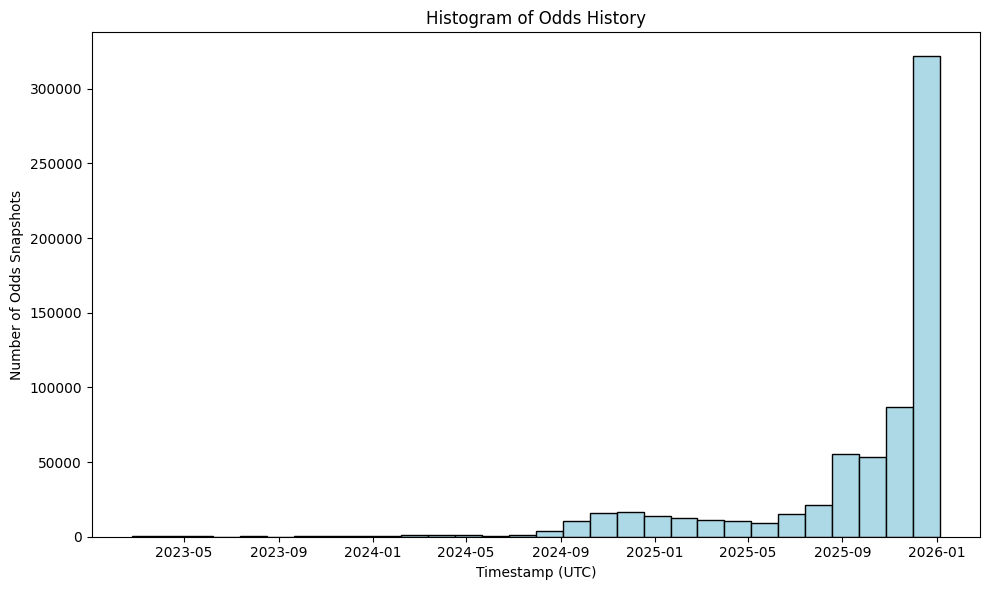

In [22]:
odds_history_plot = odds_history['timestamp'].to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(odds_history_plot, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Timestamp (UTC)')
plt.ylabel('Number of Odds Snapshots')
plt.title('Histogram of Odds History')
plt.tight_layout()
plt.show()

This histogram of odds data from Polymarket in conjunction with the histogram of events data from StatsBomb are my primary reason for pivoting away from the original research question. 

There is a clear information gap between the events captured in the StatsBomb data and the odds history from Polymarket. This discrepancy highlights the need for careful alignment of data sources when analyzing player performance and market behavior. 

Considering the low overlap in StatsBomb and Polymarket data, the revised analysis will focus on Statsbomb event data exclusively and transition to an analytics dashboard.

# Revised EDA with New Research Question

Track 2 (Soccer Analytics Dashboard)

Research Question: Can we categorize team identities into distinct Styles of Play using event-level passing data and spacial distributions? This follows Track 2 of soccer analytics and the end product will be a dashboard showing a heatmap of pass patterns and characteristics of each play style.

Using match level feature engineering and k-means clustering, this project will aim to identify distinct playstyles.

In [23]:
# Load datasets using functions above
matches = load_matches()
events = events_to_utc(matches)

In [24]:
print(events.columns)

['id', 'index_num', 'period', 'minute', 'second', 'timestamp', 'duration', 'location_x', 'location_y', 'possession', 'possession_team_id', 'possession_team', 'out', 'off_camera', 'counterpress', 'under_pressure', 'type_id', 'type', 'match_id', 'team_id', 'team', 'player_id', 'player', 'position_id', 'position', 'play_pattern_id', 'play_pattern', 'shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z', 'shot_statsbomb_xg', 'shot_outcome', 'shot_technique', 'shot_body_part', 'shot_type', 'shot_key_pass_id', 'shot_freeze_frame', 'shot_first_time', 'shot_deflected', 'shot_aerial_won', 'shot_follows_dribble', 'shot_one_on_one', 'shot_open_goal', 'shot_redirect', 'shot_saved_off_target', 'shot_saved_to_post', 'pass_end_location_x', 'pass_end_location_y', 'pass_recipient_id', 'pass_recipient', 'pass_length', 'pass_angle', 'pass_height', 'pass_body_part', 'pass_type', 'pass_outcome', 'pass_technique', 'pass_assisted_shot_id', 'pass_goal_assist', 'pass_shot_assist', 'pass_cross', 'p

In [25]:
# Show unique values for pass_height and pass_type in events
print("Unique pass_height values:")
print(events.select("pass_height").unique())

print("\nUnique pass_type values:")
print(events.select("pass_type").unique())

print("\nUnique pass_outcome values:")
print(events.select("pass_outcome").unique())

Unique pass_height values:
shape: (4, 1)
┌─────────────┐
│ pass_height │
│ ---         │
│ str         │
╞═════════════╡
│ Ground Pass │
│ Low Pass    │
│ High Pass   │
│ null        │
└─────────────┘

Unique pass_type values:
shape: (8, 1)
┌──────────────┐
│ pass_type    │
│ ---          │
│ str          │
╞══════════════╡
│ Corner       │
│ Interception │
│ Goal Kick    │
│ Kick Off     │
│ Free Kick    │
│ Throw-in     │
│ Recovery     │
│ null         │
└──────────────┘

Unique pass_outcome values:
shape: (6, 1)
┌──────────────────┐
│ pass_outcome     │
│ ---              │
│ str              │
╞══════════════════╡
│ Unknown          │
│ Pass Offside     │
│ Out              │
│ Incomplete       │
│ null             │
│ Injury Clearance │
└──────────────────┘


In [45]:
print("Full StatsBomb Schema Check")
print(events.schema)

Full StatsBomb Schema Check
Schema([('id', String), ('index_num', Int32), ('period', Int32), ('minute', Int32), ('second', Int32), ('timestamp', String), ('duration', Float32), ('location_x', Float32), ('location_y', Float32), ('possession', Int32), ('possession_team_id', Int32), ('possession_team', String), ('out', Boolean), ('off_camera', Boolean), ('counterpress', Boolean), ('under_pressure', Boolean), ('type_id', Int32), ('type', String), ('match_id', Int32), ('team_id', Int32), ('team', String), ('player_id', Int32), ('player', String), ('position_id', Int32), ('position', String), ('play_pattern_id', Int32), ('play_pattern', String), ('shot_end_location_x', Float32), ('shot_end_location_y', Float32), ('shot_end_location_z', Float32), ('shot_statsbomb_xg', Float32), ('shot_outcome', String), ('shot_technique', String), ('shot_body_part', String), ('shot_type', String), ('shot_key_pass_id', String), ('shot_freeze_frame', String), ('shot_first_time', Boolean), ('shot_deflected', Boo

In [26]:
# Select passing features for exploration
pass_features = events.filter(pl.col("type") == "Pass").select([
    "pass_length", "pass_angle", "pass_height", "pass_type", "pass_outcome", "pass_cross", "pass_switch", "pass_through_ball"
])

# Generate summary statistics to understand the data scale
print("Pass Attribute Summary")
with pl.Config(tbl_cols=-1):
    print(pass_features.describe())

Pass Attribute Summary
shape: (9, 9)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ statisti ┆ pass_len ┆ pass_ang ┆ pass_hei ┆ pass_typ ┆ pass_out ┆ pass_cro ┆ pass_swi ┆ pass_thr │
│ c        ┆ gth      ┆ le       ┆ ght      ┆ e        ┆ come     ┆ ss       ┆ tch      ┆ ough_bal │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ l        │
│ str      ┆ f64      ┆ f64      ┆ str      ┆ str      ┆ str      ┆ f64      ┆ f64      ┆ ---      │
│          ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ count    ┆ 3.38776e ┆ 3.38776e ┆ 3387760  ┆ 713056   ┆ 754324   ┆ 3.38776e ┆ 3.38776e ┆ 3.38776e │
│          ┆ 6        ┆ 6        ┆          ┆          ┆          ┆ 6        ┆ 6        ┆ 6        │
│ null_cou ┆ 0.0      ┆ 0.0      ┆ 0        ┆ 2674704 

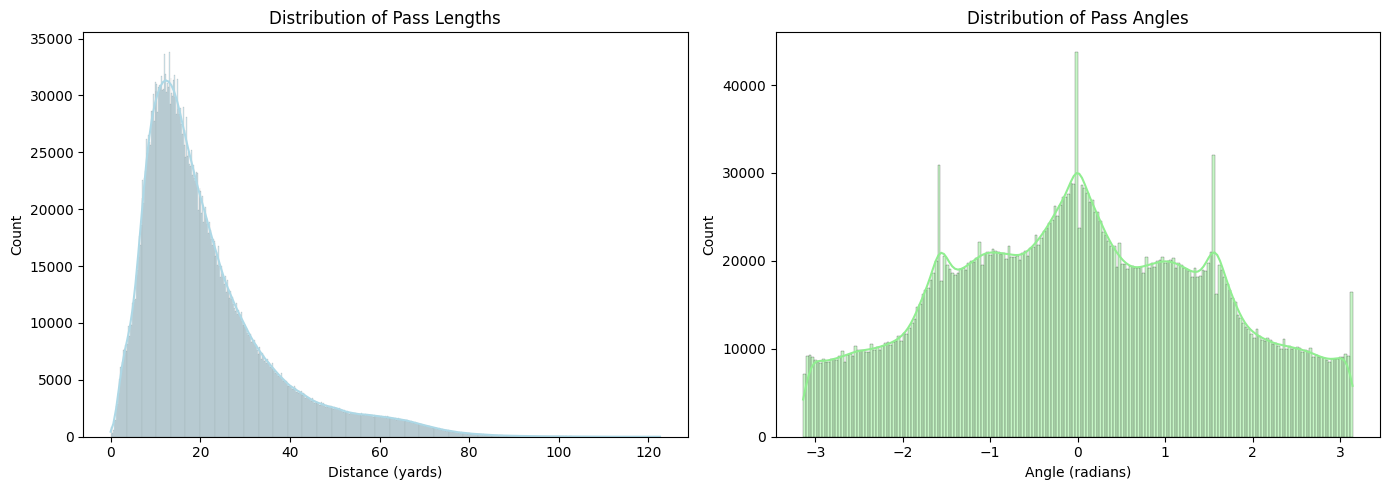

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plot 1: Pass Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(pass_features["pass_length"].to_list(), kde=True, color='lightblue')
plt.title("Distribution of Pass Lengths")
plt.xlabel("Distance (yards)")

# Plot 2: Pass Angle Distribution
# Note: 0 is horizontal, +/- 1.57 is vertical, +/- 3.14 is backward (radian angles where the length of the pitch is the horizontal axis)
plt.subplot(1, 2, 2)
sns.histplot(pass_features["pass_angle"].to_list(), kde=True, color='lightgreen')
plt.title("Distribution of Pass Angles")
plt.xlabel("Angle (radians)")

plt.tight_layout()
plt.show()

/var/folders/f1/6wqy11w93lzgkf_8n939yv040000gn/T/ipykernel_41178/2357692378.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=height_success.to_pandas(), x="pass_height", y="success_rate", palette="viridis")


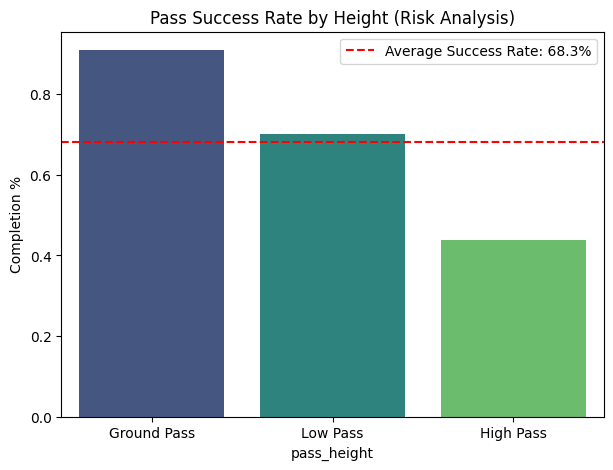

In [ ]:
# Analyze relationship between Height and Success
height_success = (
    events.filter(pl.col("type") == "Pass")
    .with_columns(pl.col("pass_outcome").is_null().alias("is_success"))
    .group_by("pass_height")
    .agg([
        pl.len().alias("total"),
        pl.col("is_success").mean().alias("success_rate")
    ])
    .sort("success_rate", descending=True)
)

# Visualize Success Rate by Height
plt.figure(figsize=(7, 5))
sns.barplot(data=height_success.to_pandas(), x="pass_height", y="success_rate", palette="viridis")
avg_success = height_success["success_rate"].mean()
plt.axhline(avg_success, color='red', linestyle='--', label=f'Average Success Rate: {avg_success:.1%}')
plt.title("Pass Success Rate by Height (Risk Analysis)")
plt.ylabel("Completion %")
plt.xlabel("Pass Height Category")
plt.legend()
plt.show()

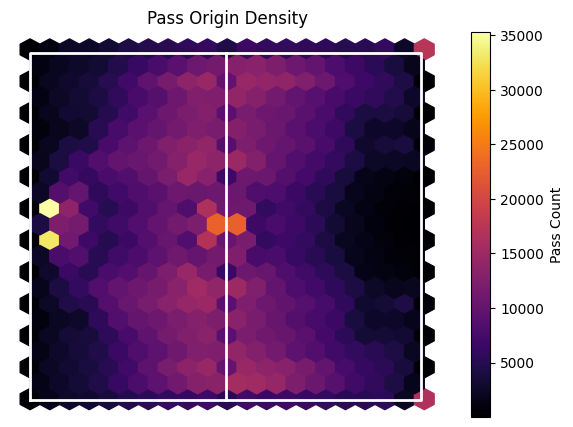

In [29]:
# Plot for pass origin density
locs = events.filter(pl.col("type") == "Pass").select(["location_x", "location_y"])
x = locs["location_x"].drop_nans().drop_nulls().to_list()
y = locs["location_y"].drop_nans().drop_nulls().to_list()

plt.figure(figsize=(7, 5))
hb = plt.hexbin(x, y, gridsize=20, cmap='inferno', mincnt=1)
plt.colorbar(hb, label='Pass Count')

# Overlay Pitch Lines
plt.plot([0, 120, 120, 0, 0], [0, 0, 80, 80, 0], color="white", lw=2) # Pitch outline
plt.plot([60, 60], [0, 80], color="white", lw=2) # Halfway line
plt.title("Pass Origin Density")
plt.axis('off')
plt.show()

/var/folders/f1/6wqy11w93lzgkf_8n939yv040000gn/T/ipykernel_41178/3494598147.py:20: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  data=match_summary.filter(pl.col("team").is_in(top_teams)).to_pandas(),
/var/folders/f1/6wqy11w93lzgkf_8n939yv040000gn/T/ipykernel_41178/3494598147.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


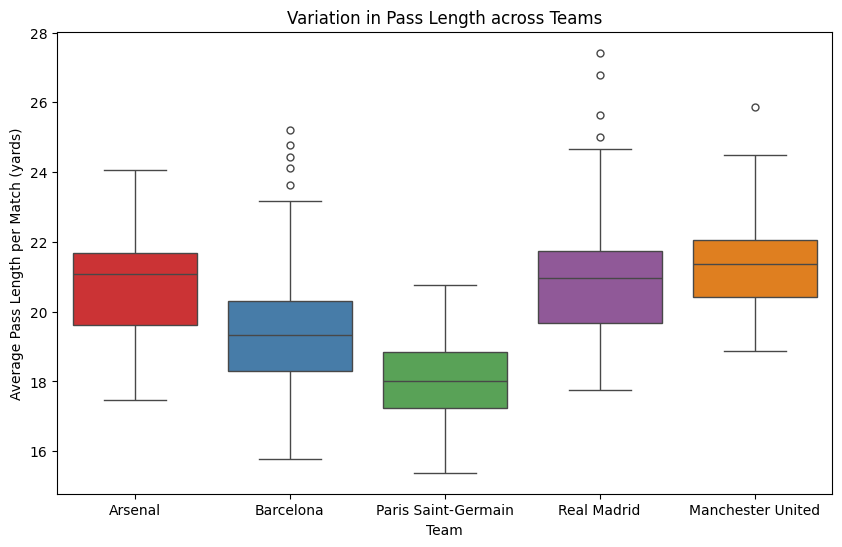

In [ ]:
# Plot pass length variation across matches for top teams to explore play style diffences

match_summary = (
    events.filter(pl.col("type") == "Pass")
    .group_by(["match_id", "team"])
    .agg(pl.col("pass_length").mean().alias("avg_pass_length"))
)

# Select top 5 teams by number of matches
top_teams = (
    match_summary["team"]
    .value_counts()
    .sort("count", descending=True)
    .head(5)["team"]
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=match_summary.filter(pl.col("team").is_in(top_teams)).to_pandas(),
    x="team",
    y="avg_pass_length",
    palette="Set1",
    fliersize=5 # for outliers
)

plt.title("Variation in Pass Length across Teams", fontsize=12)
plt.ylabel("Average Pass Length per Match (yards)")
plt.xlabel("Team")
plt.show()

In [32]:
# Aggregate features at a match level to create a Playing Style for each team in each match. 
match_passing_style = (
    events.filter(pl.col("type") == "Pass")
    .with_columns([
        pl.col("pass_angle").abs().alias("abs_angle"), # Absolute angle to capture verticality regardless of direction
        (pl.col("pass_height") == "High Pass").alias("is_high"), # Risk ratio: % of high passes, which are riskier
        pl.col("pass_outcome").is_null().alias("is_success"), # Completion rate: % of complete passes (no negative outcome)
        pl.col("pass_cross").fill_null(False).alias("is_cross"), 
        pl.col("pass_switch").fill_null(False).alias("is_switch"),
        pl.col("pass_through_ball").fill_null(False).alias("is_through_ball")
    ])
    .group_by(["match_id", "team"])
    .agg([
        pl.col("pass_length").mean().alias("avg_length"), 
        pl.col("abs_angle").mean().alias("avg_verticality"), 
        pl.col("is_success").mean().alias("completion_rate"),
        pl.col("is_high").mean().alias("risk_ratio"),
        pl.col("is_cross").mean().alias("cross_rate"),
        pl.col("is_switch").mean().alias("switch_rate"),
        pl.col("is_through_ball").mean().alias("through_ball_rate"),
        pl.len().alias("pass_volume")
    ])
    # Filter for matches with a sufficient number of passes 
    .filter(pl.col("pass_volume") > 100)
    .sort("match_id")
)

print(f"Total Match-Team Data Points: {match_passing_style.height}")
with pl.Config(tbl_cols=-1):
    print(match_passing_style.head())

Total Match-Team Data Points: 6928
shape: (5, 10)
┌─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬────────┐
│ match_i ┆ team    ┆ avg_len ┆ avg_ver ┆ complet ┆ risk_ra ┆ cross_r ┆ switch_ ┆ through ┆ pass_v │
│ d       ┆ ---     ┆ gth     ┆ ticalit ┆ ion_rat ┆ tio     ┆ ate     ┆ rate    ┆ _ball_r ┆ olume  │
│ ---     ┆ str     ┆ ---     ┆ y       ┆ e       ┆ ---     ┆ ---     ┆ ---     ┆ ate     ┆ ---    │
│ i32     ┆         ┆ f32     ┆ ---     ┆ ---     ┆ f64     ┆ f64     ┆ f64     ┆ ---     ┆ u32    │
│         ┆         ┆         ┆ f32     ┆ f64     ┆         ┆         ┆         ┆ f64     ┆        │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ 7298    ┆ Chelsea ┆ 20.8967 ┆ 1.28108 ┆ 0.75623 ┆ 0.27063 ┆ 0.02495 ┆ 0.01535 ┆ 0.00575 ┆ 521    │
│         ┆ FCW     ┆ 13      ┆ 1       ┆ 8       ┆ 3       ┆ 2       ┆ 5       ┆ 8       ┆        │
│ 7298    ┆ Manches ┆ 20.5649 ┆ 1.24902 ┆

In [50]:
# Check for missing data
null_count = match_passing_style.null_count()
print("Null counts in Tactical DNA features:")
display(null_count)

Null counts in Tactical DNA features:


match_id,team,avg_length,avg_verticality,completion_rate,risk_ratio,cross_rate,switch_rate,through_ball_rate,pass_volume
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


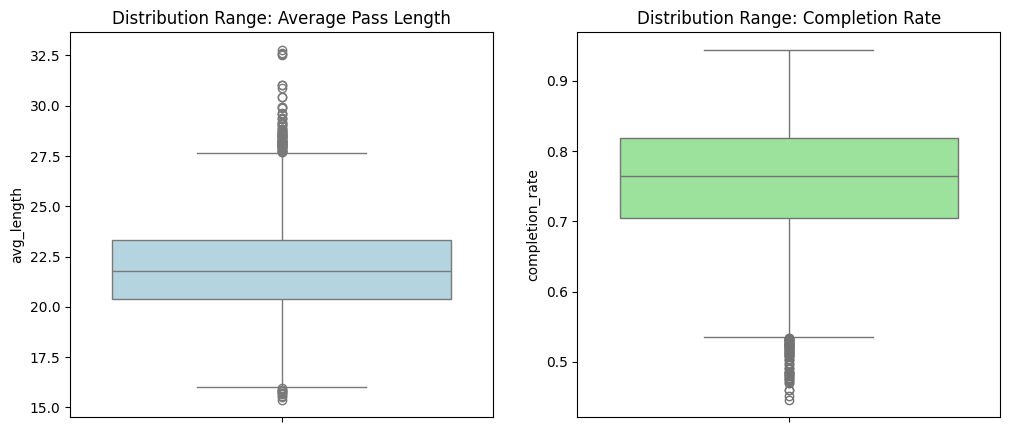

In [57]:
# Range and Outlier Check
# Using boxplots to identify matches with 'extreme' tactical behavior
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=match_passing_style.to_pandas(), y="avg_length", color='lightblue')
plt.title("Distribution Range: Average Pass Length")

plt.subplot(1, 2, 2)
sns.boxplot(data=match_passing_style.to_pandas(), y="completion_rate", color='lightgreen')
plt.title("Distribution Range: Completion Rate")
plt.show()

In [64]:
# Descriptive Statistics for selected features
with pl.Config(tbl_cols=-1):
    display(match_passing_style.describe())

statistic,match_id,team,avg_length,avg_verticality,completion_rate,risk_ratio,cross_rate,switch_rate,through_ball_rate,pass_volume
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",6928.0,"""6928""",6928.0,6928.0,6928.0,6928.0,6928.0,6928.0,6928.0,6928.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.9863e6,null,21.900457,1.232719,0.757936,0.241548,0.024191,0.02813,0.004951,488.995381
"""std""",1.5503e6,null,2.265499,0.118667,0.083121,0.091895,0.011016,0.011682,0.005491,141.512346
"""min""",7298.0,"""AC Ajaccio""",15.382031,0.741345,0.446154,0.039841,0.0,0.0,0.0,165.0
"""25%""",3.749434e6,null,20.375093,1.156204,0.704955,0.172867,0.016279,0.019886,0.0,387.0
"""50%""",3.825668e6,null,21.757011,1.239879,0.764298,0.233708,0.022989,0.027027,0.00339,470.0
"""75%""",3.879873e6,null,23.298672,1.318784,0.81883,0.301939,0.030738,0.034942,0.007212,574.0
"""max""",4.020846e6,"""Zambia Women's""",32.788956,1.525314,0.944149,0.633663,0.074597,0.091078,0.049608,1157.0


In [67]:
# Ensure that categorical features are not too sparse
sparsity_check = match_passing_style.select([
    (pl.col("through_ball_rate") > 0).mean().alias("matches_with_through_balls"),
    (pl.col("cross_rate") > 0).mean().alias("matches_with_crosses"),
    (pl.col("switch_rate") > 0).mean().alias("matches_with_switches")
])
print("Percentage of matches where event occurred at least once:")
print(sparsity_check)

Percentage of matches where event occurred at least once:
shape: (1, 3)
┌────────────────────────────┬──────────────────────┬───────────────────────┐
│ matches_with_through_balls ┆ matches_with_crosses ┆ matches_with_switches │
│ ---                        ┆ ---                  ┆ ---                   │
│ f64                        ┆ f64                  ┆ f64                   │
╞════════════════════════════╪══════════════════════╪═══════════════════════╡
│ 0.741339                   ┆ 0.997402             ┆ 0.999423              │
└────────────────────────────┴──────────────────────┴───────────────────────┘


In [34]:
from scipy.stats import kruskal

groups = [
    match_passing_style.filter(pl.col("team") == team)["avg_length"].to_list() 
    for team in top_teams
]

# Use a Kruskal-Wallis H-test to determine if there are statistically significant differences in average pass length between the top teams.
# H0: The population medians of all 5 teams are equal (No difference in style).
# H1: At least one population median is different (Styles are statistically distinct).
stat, p = kruskal(*groups)

print("Kruskal-Wallis H-test")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4e}")

if p < 0.05:
    print("\nResult: Reject the Null Hypothesis.")
    print("There is a statistically significant difference in the average pass length between these teams.")
else:
    print("\nResult: Fail to reject the Null Hypothesis.")
    print("The differences in passing length are not statistically significant at the 5% level.")

Kruskal-Wallis H-test
Statistic: 242.6888
P-value: 2.4456e-51

Result: Reject the Null Hypothesis.
There is a statistically significant difference in the average pass length between these teams.


In [43]:
# Use the match-level playing style data to visualize play style using a radar chart to compare different teams.

import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Aggregate to team level
features = ["avg_length", "avg_verticality", "completion_rate", "risk_ratio", "cross_rate", "switch_rate", "through_ball_rate", "pass_volume"]

team_style = (
    match_passing_style.group_by("team")
    .agg([pl.col(f).mean() for f in features])
    .to_pandas()
)

# Normalize features to a 0-1 scale for the chart
scaler = MinMaxScaler()
team_style[features] = scaler.fit_transform(team_style[features])

# Plot function to compare teams on the radar chart
def plot_team_radar(teams, df):
    fig = go.Figure()

    for team in teams:
        team_data = df[df['team'] == team]
        if team_data.empty:
            continue
            
        fig.add_trace(go.Scatterpolar(
            r=team_data[features].values.flatten().tolist(),
            theta=[f.replace("_", " ").title() for f in features],
            fill='toself',
            name=team
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=False, range=[0, 1])
        ),
        showlegend=True,
        title="Passing Style Comparison",
    )
    fig.show()

# Demonstrate with sample teams
compare_teams = ["Barcelona", "Real Madrid", "Arsenal"]
plot_team_radar(compare_teams, team_style)